## ESA CCI Toolbox Data Tree Access

Some of the data from the Open Data Portal is provided through the Toolbox in the form of DataTrees. DataTrees are basically a collection of datasets, where each dataset may be accessed through an identifier. This structure is applied to all gridded data that is subdivided into regions. As each of these region-specific datasets is a standard dataset, all toolbox operations can be applied to them.

This notebook shall serve to show what CCI datasets are concerned and how they can be opened.

To run this Notebook, make sure the ESA CCI Toolbox is setup correctly.

We start, as usual, by opening the standard `esa-cci` data store.

In [1]:
from xcube.core.store import new_data_store

cci_store = new_data_store('esa-cci')

We list the available data types of the store to make sure 'datatree' is included in the list.

In [2]:
cci_store.get_data_types()

('dataset', 'geodataframe', 'vectordatacube', 'datatree')

As datatrees are provided, we can ask which datasets are actually provided in this form.

In [3]:
list(cci_store.get_data_ids(data_type="datatree"))

['esacci.FIRE.mon.L3S.BA.MODIS.Terra.MODIS_TERRA.v5-1.pixel',
 'esacci.FIRE.mon.L3S.BA.multi-sensor.multi-platform.SYN.v1-1.pixel',
 'esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.pixel',
 'esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.v1-1.pixel',
 'esacci.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A03.v1-2.Siberia',
 'esacci.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A02.v1-2.Amazonia',
 'esacci.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A01.v1-2.Africa',
 'esacci.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A03.v1-2.Siberia',
 'esacci.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A02.v1-2.Amazonia',
 'esacci.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A01.v1-2.Africa',
 'esacci.LC.5-yrs.L4.CHANGE.multi-sensor.multi-platform.HRLCC30-A03.v1-2.Siberia',
 'esacci.LC.5-yrs.L4.CHANGE.multi-sensor.multi-platform.HRLCC30-A02.v1-2.Amazonia',
 'esacci.LC.5-yrs.L4.CHANGE.multi-sensor.multi-platform.HRLCC30-A01.v1-2.Africa',
 'esacci.VEGE

So, datatrees are provided for three ECVs: FIRE, LC, and VEGETATION. To fully show the use of datatrees, we will open FIRE and VEGETATION data.

### Opening FIRE Data

We start with opening one of the FIRE datasets.

In [4]:
fire_dataset = "esacci.FIRE.mon.L3S.BA.MODIS.Terra.MODIS_TERRA.v5-1.pixel"

As first step, we have a look at the potential opener parameters.

In [5]:
cci_store.get_open_data_params_schema(fire_dataset)

One entry that we don't see when opening datasets of other type is the property place_names. If we extend this, we see a listing of Areas 1 to 6. Each of these identifiers stands for a different area. We can either open the data tree with all areas or pass a subset of this list as a parameter to only retrieve the area we are interested in. This will also increase performance.

In [6]:
places = ["AREA_1"]

In [7]:
fire_dt = cci_store.open_data(
    fire_dataset,
    place_names=places
)
fire_dt

<xarray.DataTree 'esacci.FIRE.mon.L3S.BA.MODIS.Terra.MODIS_TERRA.v5-1.pixel'>
Group: /
└── Group: /
        Dimensions:    (time: 264, y: 28499, x: 57888, bnds: 2)
        Coordinates:
          * time       (time) datetime64[ns] 2kB 2001-01-16T12:00:00 ... 2022-12-16T1...
            time_bnds  (time, bnds) datetime64[ns] 4kB dask.array<chunksize=(264, 2), meta=np.ndarray>
          * x          (x) float64 463kB -180.0 -180.0 -180.0 ... -50.0 -50.0 -50.0
          * y          (y) float64 228kB 83.0 83.0 82.99 82.99 ... 19.01 19.0 19.0 19.0
        Dimensions without coordinates: bnds
        Data variables:
            CL         (time, y, x) uint8 436GB dask.array<chunksize=(1, 28499, 144), meta=np.ndarray>
            JD         (time, y, x) int16 871GB dask.array<chunksize=(1, 28499, 144), meta=np.ndarray>
            LC         (time, y, x) uint8 436GB dask.array<chunksize=(1, 28499, 144), meta=np.ndarray>
        Attributes:
            Conventions:             CF-1.7
         

We can see which datasets are available by asking for its keys.

In [8]:
list(fire_dt.keys())

['AREA_1']

As expected, it is the place(s) we had requested. We can now retrieve a dataset from any of the keys.

In [9]:
ds = fire_dt.get(places[0]).to_dataset()
ds

<xarray.Dataset> Size: 2TB
Dimensions:    (time: 264, y: 28499, x: 57888, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2kB 2001-01-16T12:00:00 ... 2022-12-16T1...
    time_bnds  (time, bnds) datetime64[ns] 4kB dask.array<chunksize=(264, 2), meta=np.ndarray>
  * x          (x) float64 463kB -180.0 -180.0 -180.0 ... -50.0 -50.0 -50.0
  * y          (y) float64 228kB 83.0 83.0 82.99 82.99 ... 19.01 19.0 19.0 19.0
Dimensions without coordinates: bnds
Data variables:
    CL         (time, y, x) uint8 436GB dask.array<chunksize=(1, 28499, 144), meta=np.ndarray>
    JD         (time, y, x) int16 871GB dask.array<chunksize=(1, 28499, 144), meta=np.ndarray>
    LC         (time, y, x) uint8 436GB dask.array<chunksize=(1, 28499, 144), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.FIRE.mon.L3S.BA.MODIS.Terra.MODIS_TERRA.v...
    date_created:            2025-12-08T12:04:28.461120
    processing_level:        L3S
    time_coverage_start:     2001-01-01T00:00:00
    time_coverage_end:       2023-01-01T00:00:00
    time_coverage_duration:  P8035DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

And, of course, we can open and plot any of the data variables:

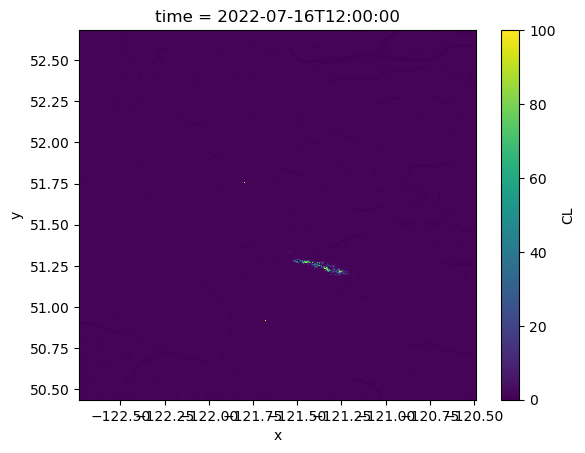

In [10]:
ds.CL.isel({"time": -6, "x": slice(25500, 26500), "y": slice(13500, 14500)}).plot()

### Opening VEGETATION Data

We continue by opening a VEGETATION data set. What's particular about this dataset is that it offers a lot of different sites, as becomes apparent from looking at the places in the schema properties

In [11]:
vegetation_ds = "esacci.VEGETATION.5-days.L3S.VP_PRODUCTS.VEGETATION.SPOT-5.MERGED.v1-0.r1"

In [12]:
cci_store.get_open_data_params_schema(vegetation_ds)

We can pick any of those sites and use them to open the data tree.

In [13]:
places = ["site_00001_ABRACOS_HILL", "site_00021_BASKIN"]

In [14]:
abracos = cci_store.open_data(
    vegetation_ds,
    place_names=places
)
abracos

<xarray.DataTree 'esacci.VEGETATION.5-days.L3S.VP_PRODUCTS.VEGETATION.SPOT-5.MERGED.v1-0.r1'>
Group: /
├── Group: /
│       Dimensions:                   (time: 730, lat: 3, lon: 3, nbnds: 2, bnds: 2)
│       Coordinates:
│         * lat                       (lat) float32 12B -10.75 -10.76 -10.77
│           lat_bnds                  (lat, nbnds) float32 24B dask.array<chunksize=(3, 2), meta=np.ndarray>
│         * lon                       (lon) float32 12B -62.37 -62.36 -62.35
│           lon_bnds                  (lon, nbnds) float32 24B dask.array<chunksize=(3, 2), meta=np.ndarray>
│         * time                      (time) datetime64[ns] 6kB 2004-01-01T11:59:59 ....
│           time_bnds                 (time, bnds) datetime64[ns] 12kB dask.array<chunksize=(730, 2), meta=np.ndarray>
│       Dimensions without coordinates: nbnds, bnds
│       Data variables: (12/69)
│           BHR_NIR                   (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarr

Again, we see check that the correct places are provided.

In [15]:
list(abracos.keys())

['site_00001_ABRACOS_HILL', 'site_00021_BASKIN']

We now open one of these datasets.

In [16]:
ds = abracos.get(places[0]).to_dataset()
ds

<xarray.Dataset> Size: 4MB
Dimensions:                   (time: 730, lat: 3, lon: 3, nbnds: 2, bnds: 2)
Coordinates:
  * lat                       (lat) float32 12B -10.75 -10.76 -10.77
    lat_bnds                  (lat, nbnds) float32 24B dask.array<chunksize=(3, 2), meta=np.ndarray>
  * lon                       (lon) float32 12B -62.37 -62.36 -62.35
    lon_bnds                  (lon, nbnds) float32 24B dask.array<chunksize=(3, 2), meta=np.ndarray>
  * time                      (time) datetime64[ns] 6kB 2004-01-01T11:59:59 ....
    time_bnds                 (time, bnds) datetime64[ns] 12kB dask.array<chunksize=(730, 2), meta=np.ndarray>
Dimensions without coordinates: nbnds, bnds
Data variables: (12/69)
    BHR_NIR                   (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    BHR_NIR_BHR_SW_correl     (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    BHR_NIR_DHR_NIR_correl    (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    BHR_NIR_DHR_SW_correl     (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    BHR_NIR_DHR_VIS_correl    (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    BHR_NIR_ERR               (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    ...                        ...
    fAPAR_DHR_VIS_correl      (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    fAPAR_ERR                 (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    fAPAR_fAPAR_Cab_correl    (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    invcode                   (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    n_bands_used              (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
    p_chisquare               (time, lat, lon) float64 53kB dask.array<chunksize=(73, 3, 3), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.VEGETATION.5-days.L3S.VP_PRODUCTS.VEGETAT...
    date_created:            2025-12-08T12:10:15.529611
    processing_level:        L3S
    time_coverage_start:     2004-01-01T00:00:00
    time_coverage_end:       2013-12-27T23:59:59
    time_coverage_duration:  P3648DT23H59M59S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

We see that this dataset has only a small extent spatially, but provides a long time series, so we do not plot an area, but pick the time series for one of the grid cells.

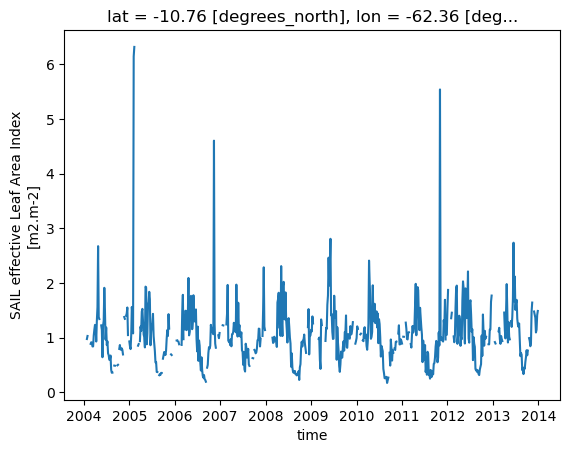

In [17]:
ds.LAI.isel(lat=1, lon=1).plot()